## Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, interactive

## Main functionallity 

In [33]:
def euclidean_dist(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def bottom_triangle(triangle_mesh, colors, params, plane):
    w, h = params
    
    local_triangle = np.array(triangle_mesh.copy())
    local_colors = np.array(colors.copy())
    
    ys = local_triangle[:, 1]
    indices = np.argsort(ys)
    local_triangle = local_triangle[indices][::-1].tolist()
    local_colors = np.array(local_colors)[indices][::-1].tolist()
    
    v = local_triangle
    
    if v[1][0] > v[2][0]:
        v[1], v[2] = v[2], v[1]
        local_colors[1], local_colors[2] = local_colors[2], local_colors[1]
    
    dy1, dy2 = int(h - v[0][1]), int(h - v[1][1])
    local_colors = np.array(local_colors)
   

    slope1 = (v[1][0] - v[0][0]) / (v[1][1] - v[0][1])
    slope2 = (v[2][0] - v[0][0]) / (v[2][1] - v[0][1]) 
    
    line1 = euclidean_dist(v[0], v[1])
    line2 = euclidean_dist(v[0], v[2])

    
    curx1, curx2 = v[0][0], v[0][0]
    curx_border1, curx_border2 = curx1, curx2
    color_border1, color_border2 = local_colors[0], local_colors[0]
    dy2 = dy2 +1 if dy2 < h else dy2
    
    for y in range(dy1, dy2, 1):
        for x in range(curx_border1, curx_border2 + 1, 1):
            wl = euclidean_dist([x, y], [curx_border1, y])
            wr = euclidean_dist([x, y], [curx_border2, y])
            length = wr + wl + 1e-9
            plane[y][x] = ((wr/length)*color_border1 + (wl/length) * color_border2).astype(int)
       
        curx1 -= slope1
        curx2 -= slope2
        
        curx_border1, curx_border2 = int(curx1), int(curx2)
        color_border1 = (((line1 - euclidean_dist([curx_border1, y], [v[0][0], h - v[0][1]])) / line1) * local_colors[0] \
                        +  ((line1 - euclidean_dist([curx_border1, y],[v[1][0], h - v[1][1]])) / line1) *local_colors[1]).astype(int)
        
        color_border2 = (((line2 - euclidean_dist([curx_border2, y], [v[0][0], h - v[0][1]])) / line2) * local_colors[0] \
                        +  ((line2 - euclidean_dist([curx_border2, y],[v[2][0], h - v[2][1]])) / line2) *local_colors[2]).astype(int)
        
def top_triangle(triangle_mesh, colors, params, plane):
    w, h = params
    
    local_triangle = np.array(triangle_mesh.copy())
    local_colors = np.array(colors.copy())
    
    ys = local_triangle[:, 1]
    indices = np.argsort(ys)
    
    local_triangle = local_triangle[indices][::-1].tolist()
    local_colors = np.array(local_colors)[indices][::-1].tolist()
    
    v = local_triangle
    if v[0][0] > v[1][0]:
        v[0], v[1] = v[1], v[0]
        local_colors[0], local_colors[1] = local_colors[1], local_colors[0]

    dy1, dy2 = int(h - v[2][1]), int(h - v[0][1])
    local_colors = np.array(local_colors)
   
    slope1 = (v[2][0] - v[0][0]) / (v[2][1] - v[0][1]) 
    slope2 = (v[2][0] - v[1][0]) / (v[2][1] - v[1][1])
    
    line1 = euclidean_dist(v[2], v[0])
    line2 = euclidean_dist(v[2], v[1])


    curx1, curx2 = v[2][0], v[2][0]
    curx_border1, curx_border2 = curx1, curx2
    color_border1, color_border2 = local_colors[2], local_colors[2]
    dy2 = dy2 - 1 if dy2 > 0 else dy2
    fig, ax = plt.subplots()
    
    for y in range(dy1, dy2, -1):
        for x in range(curx_border1, curx_border2 + 1, 1):
            wl = euclidean_dist([x, y], [curx_border1, y])
            wr = euclidean_dist([x, y], [curx_border2, y])
            length = wr + wl + 1e-9
            plane[y][x] = ((wr/length)*color_border1 + (wl/length) * color_border2).astype(int)

        curx1 += slope1
        curx2 += slope2
        
        curx_border1, curx_border2 = int(curx1), int(curx2)
        color_border1 = (((line1 - euclidean_dist([curx_border1, y], [v[2][0], h - v[2][1]])) / line1) * local_colors[2] \
                        +  ((line1 - euclidean_dist([curx_border1, y],[v[0][0], h - v[0][1]])) / line1) *local_colors[0]).astype(int)
        
        color_border2 = (((line2 - euclidean_dist([curx_border2, y], [v[2][0], h - v[2][1]])) / line2) * local_colors[2] \
                        +  ((line2 - euclidean_dist([curx_border2, y],[v[1][0], h - v[1][1]])) / line2) *local_colors[1]).astype(int)

def fill_triangle(triangle_mesh,colors,  params):
    w, h =params
    result = np.zeros((h, w, 3),dtype=int)
    triangle_mesh = np.array(triangle_mesh)
    ys = triangle_mesh[:, 1]
    indices = np.argsort(ys)
    
    triangle_mesh = triangle_mesh[indices][::-1]
    colors = np.array(colors)[indices][::-1]

    if triangle_mesh[0][1] == triangle_mesh[1][1]:
        top_triangle(triangle_mesh, colors, params, result)
    elif triangle_mesh[1][1] == triangle_mesh[2][1]:
        bottom_triangle(triangle_mesh, colors, params, result)
    else:
        x = int(triangle_mesh[0][0] + ((triangle_mesh[1][1] - triangle_mesh[0][1]) / (triangle_mesh[2][1] - triangle_mesh[0][1])) * (triangle_mesh[2][0] - triangle_mesh[0][0]))
        point = [x, triangle_mesh[1][1]] 
        wl = euclidean_dist(point, triangle_mesh[0])
        wr = euclidean_dist(point, triangle_mesh[2])
        length = wl + wr
        color_p = ((wr/length) * np.array(colors[0]) + (wl/length) * np.array(colors[2])).astype(int)
        top, bottom = [triangle_mesh[1], point, triangle_mesh[2]], \
                      [triangle_mesh[0], triangle_mesh[1],  point]
        colors_top, colors_bottom = [colors[1], color_p, colors[2]], \
                                    [colors[0], colors[1], color_p]
        bottom_triangle(bottom, colors_bottom, params, result)
        top_triangle(top, colors_top, params, result)
    return result



## Performance

In [34]:
@interact(a_x=(0, 1600), a_y=(0,900), b_x=(0,1600), b_y=(0,900), c_x=(0,1600), c_y=(0,900), 
          a_r=(0,255), a_g=(0,255), a_b=(0,255), b_r=(0,255), b_g=(0,255), b_b=(0,255), c_r=(0,255), c_g=(0,255), c_b=(0,255))
def draw_triangle(a_x=312, a_y=370, b_x=923, b_y=132, c_x=443, c_y=724, 
                  a_r=255, a_g=0, a_b=0, b_r=0, b_g=255, b_b=0, c_r=0, c_g=0, c_b=255):
    width, height = 1600, 900
    triangle = [[a_x, a_y],
                [b_x, b_y],
                [c_x, c_y]]
    colors = [[a_r, a_g, a_b],
              [b_r, b_g, b_b],
              [c_r, c_g, c_b]]
    plt.imshow(fill_triangle(triangle_mesh=triangle, colors=colors, params=(width, height)))

interactive(children=(IntSlider(value=312, description='a_x', max=1600), IntSlider(value=370, description='a_y…

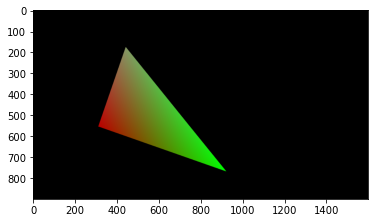

In [35]:
plt.imshow(fill_triangle(triangle_mesh=[[312,346],[923, 132],[443,724]], colors=[[188,0,0],[0, 255,0],[134, 153, 102]], params=(1600,900)))